### Gaussian Mixture Model (GMM)

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


✅ Optimal k based on BIC: 9
✅ Clustered Data Saved: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_gmm_clustered.csv


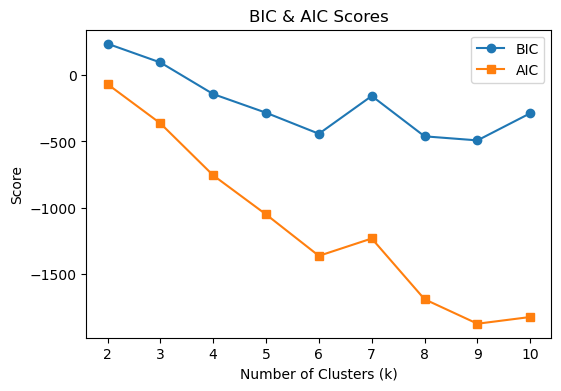

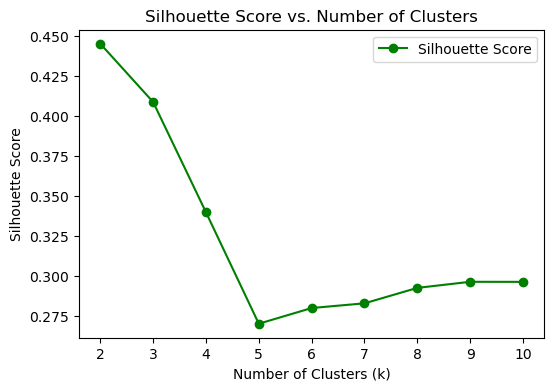

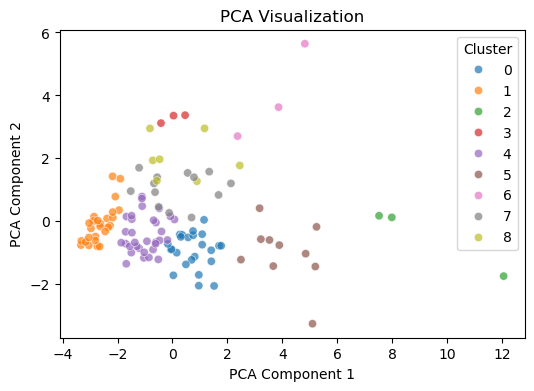

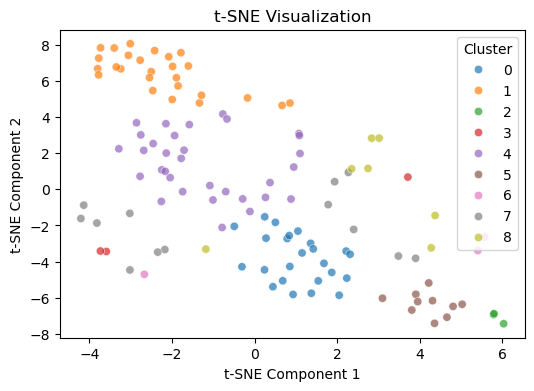

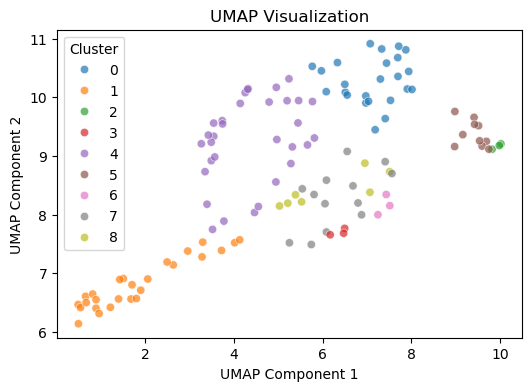

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load Data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop 'Cell Number' if present
df = df.drop(columns=["Cell Number"], errors="ignore")

# Normalize Data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Hyperparameter Tuning for GMM
bic_scores, aic_scores, silhouette_scores = [], [], []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    silhouette_scores.append(silhouette_score(X, labels))

# Find optimal k
optimal_k = k_values[np.argmin(bic_scores)]
print(f"✅ Optimal k based on BIC: {optimal_k}")

# Final GMM Clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df["Cluster"] = gmm.fit_predict(X)

# Save Results
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_gmm_clustered.csv"
df.to_csv(output_path, index=False)
print(f"✅ Clustered Data Saved: {output_path}")

# Plot BIC, AIC, and Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(k_values, bic_scores, marker='o', label='BIC')
plt.plot(k_values, aic_scores, marker='s', label='AIC')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("BIC & AIC Scores")
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.legend()
plt.show()

# Visualization (PCA, t-SNE, UMAP)
def plot_clusters(X_transformed, method_name):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=df["Cluster"], palette="tab10", alpha=0.7)
    plt.xlabel(f"{method_name} Component 1")
    plt.ylabel(f"{method_name} Component 2")
    plt.title(f"{method_name} Visualization")
    plt.legend(title="Cluster")
    plt.show()

# PCA
X_pca = PCA(n_components=2).fit_transform(X)
plot_clusters(X_pca, "PCA")

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
plot_clusters(X_tsne, "t-SNE")

# UMAP
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
plot_clusters(X_umap, "UMAP")


BIC: -283.8461334371864
AIC: -1049.8927429306934
Silhouette Score: 0.2702907317264642


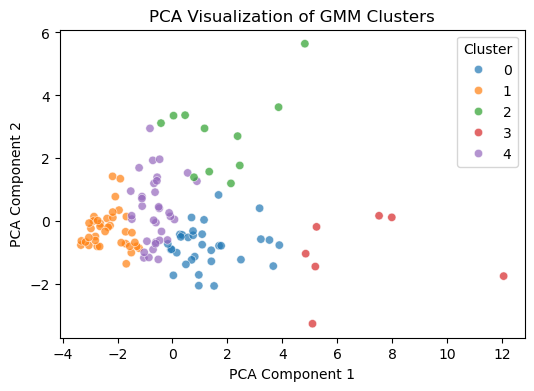

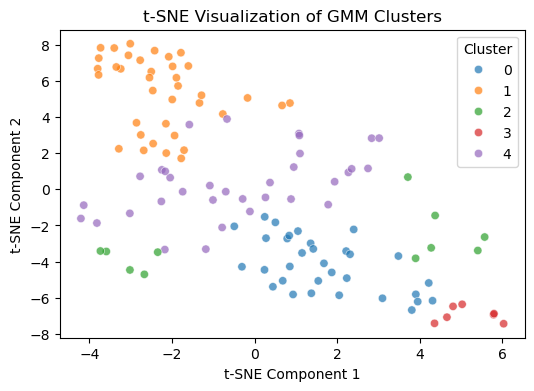

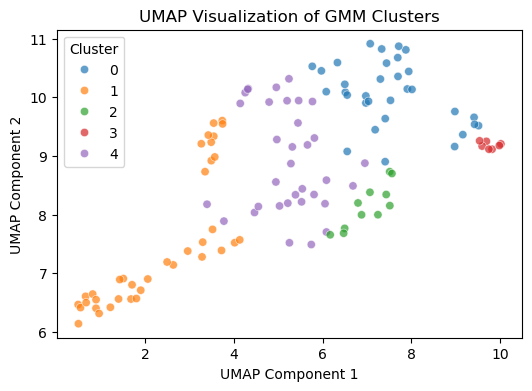

✅ Clustered Data Saved: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm1.csv
🔢 Number of Clusters: 5


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop "Cell Number" if present (not used for clustering)
if "Cell Number" in df.columns:
    df = df.drop(columns=["Cell Number"])

# Normalize Data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Hyperparameter Tuning for GMM
best_k = 5  # Fixed number of clusters

# Fit GMM Model
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm.fit_predict(X)
df["Cluster"] = gmm_labels

# Compute BIC, AIC, and Silhouette Score
bic = gmm.bic(X)
aic = gmm.aic(X)
silhouette = silhouette_score(X, gmm_labels)

print(f"BIC: {bic}")
print(f"AIC: {aic}")
print(f"Silhouette Score: {silhouette}")

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='tab10', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of GMM Clusters")
plt.legend(title="Cluster")
plt.show()

# t-SNE Visualization
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=gmm_labels, palette='tab10', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of GMM Clusters")
plt.legend(title="Cluster")
plt.show()

# UMAP Visualization
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=gmm_labels, palette='tab10', alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization of GMM Clusters")
plt.legend(title="Cluster")
plt.show()

# Save Final Clusters to CSV
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm1.csv"
df.to_csv(output_path, index=False)
print(f"✅ Clustered Data Saved: {output_path}")
print(f"🔢 Number of Clusters: {best_k}")


n_components=2, covariance_type=full, BIC=236.096, AIC=-68.645, Silhouette=0.445
n_components=2, covariance_type=tied, BIC=990.611, AIC=811.680, Silhouette=0.590
n_components=2, covariance_type=diag, BIC=2443.394, AIC=2339.950, Silhouette=0.356
n_components=2, covariance_type=spherical, BIC=2476.877, AIC=2418.166, Silhouette=0.363
n_components=3, covariance_type=full, BIC=94.808, AIC=-363.701, Silhouette=0.409
n_components=3, covariance_type=tied, BIC=991.290, AIC=784.402, Silhouette=0.400
n_components=3, covariance_type=diag, BIC=1951.040, AIC=1794.476, Silhouette=0.259
n_components=3, covariance_type=spherical, BIC=2122.139, AIC=2032.674, Silhouette=0.260
n_components=4, covariance_type=full, BIC=-143.267, AIC=-755.545, Silhouette=0.340
n_components=4, covariance_type=tied, BIC=995.127, AIC=760.281, Silhouette=0.285
n_components=4, covariance_type=diag, BIC=1931.226, AIC=1721.542, Silhouette=0.337
n_components=4, covariance_type=spherical, BIC=1953.540, AIC=1833.321, Silhouette=0.322

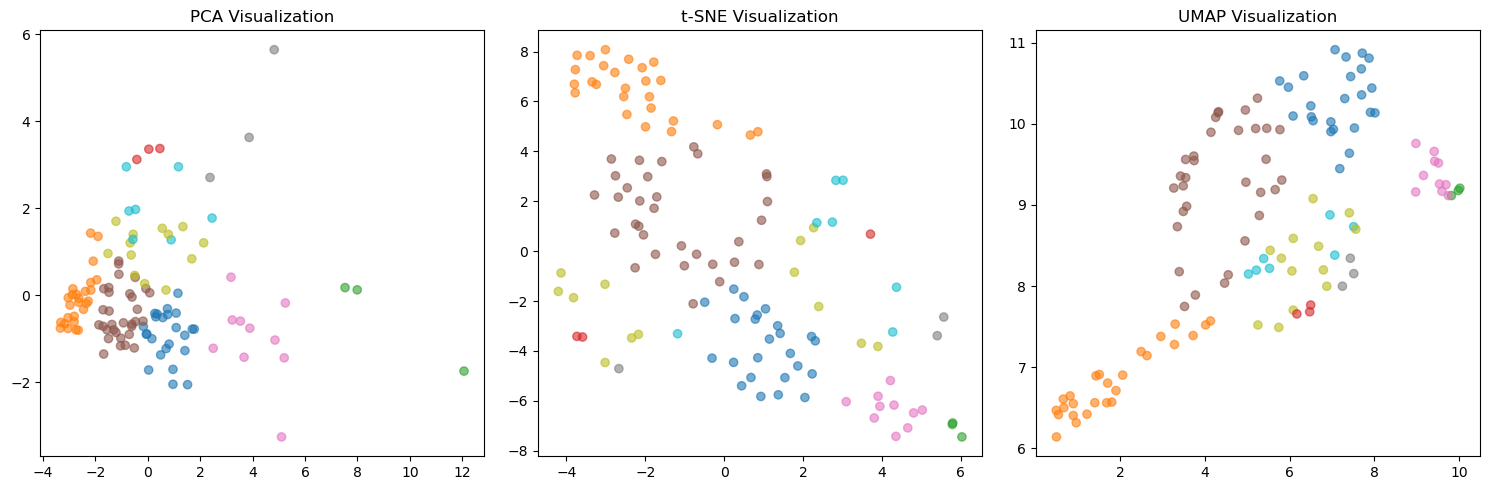

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop "Cell Number" if present
if "Cell Number" in df.columns:
    df = df.drop(columns=["Cell Number"])

# Normalize Data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Define hyperparameter search space
n_components_range = range(2, 10)  # Testing from 2 to 10 clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_bic = np.inf
best_aic = np.inf
best_silhouette = -1
best_model = None
best_params = {}

# Grid search for best GMM parameters
for n in n_components_range:
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(X)
        
        labels = gmm.predict(X)
        bic = gmm.bic(X)
        aic = gmm.aic(X)
        silhouette = silhouette_score(X, labels) if n > 1 else -1  # Silhouette score needs at least 2 clusters
        
        print(f"n_components={n}, covariance_type={cov_type}, BIC={bic:.3f}, AIC={aic:.3f}, Silhouette={silhouette:.3f}")
        
        # Select best model (lowest BIC, AIC and highest silhouette score)
        if bic < best_bic or (bic == best_bic and silhouette > best_silhouette):
            best_bic = bic
            best_aic = aic
            best_silhouette = silhouette
            best_model = gmm
            best_params = {"n_components": n, "covariance_type": cov_type}

# Print best parameters
print("\nBest GMM Parameters:", best_params)

# Apply best model
df["Cluster"] = best_model.predict(X)

# Save results
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv"
df.to_csv(output_path, index=False)
print(f"✅ Clustered Data Saved: {output_path}")

# **Visualization: PCA, t-SNE, UMAP**
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[0].set_title("PCA Visualization")

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[1].set_title("t-SNE Visualization")

# UMAP
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[2].set_title("UMAP Visualization")

plt.tight_layout()
plt.show()


n_components=2, covariance_type=full, BIC=236.096, AIC=-68.645, Silhouette=0.445
n_components=2, covariance_type=tied, BIC=990.611, AIC=811.680, Silhouette=0.590
n_components=2, covariance_type=diag, BIC=2443.394, AIC=2339.950, Silhouette=0.356
n_components=2, covariance_type=spherical, BIC=2476.877, AIC=2418.166, Silhouette=0.363
n_components=3, covariance_type=full, BIC=94.808, AIC=-363.701, Silhouette=0.409
n_components=3, covariance_type=tied, BIC=991.290, AIC=784.402, Silhouette=0.400
n_components=3, covariance_type=diag, BIC=1951.040, AIC=1794.476, Silhouette=0.259
n_components=3, covariance_type=spherical, BIC=2122.139, AIC=2032.674, Silhouette=0.260
n_components=4, covariance_type=full, BIC=-143.267, AIC=-755.545, Silhouette=0.340
n_components=4, covariance_type=tied, BIC=995.127, AIC=760.281, Silhouette=0.285
n_components=4, covariance_type=diag, BIC=1931.226, AIC=1721.542, Silhouette=0.337
n_components=4, covariance_type=spherical, BIC=1953.540, AIC=1833.321, Silhouette=0.322

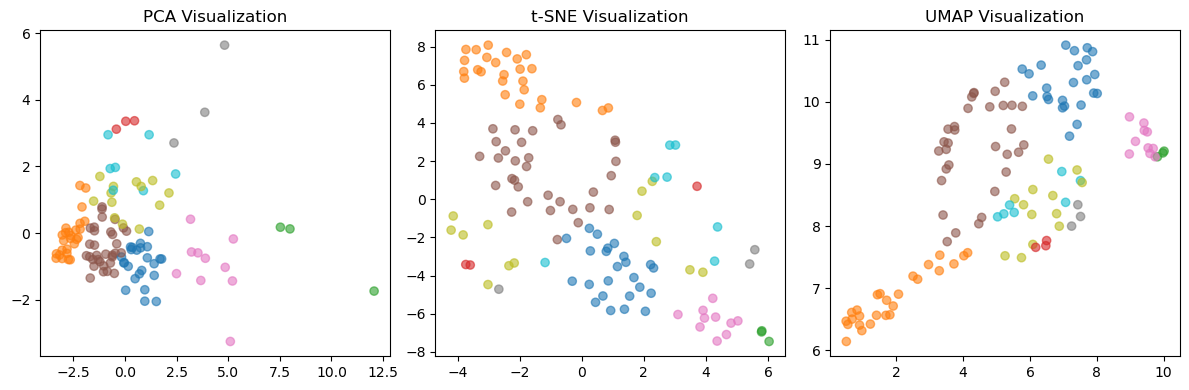

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load Data
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop "Cell Number" if present
if "Cell Number" in df.columns:
    df = df.drop(columns=["Cell Number"])

# Normalize Data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Define hyperparameter search space
n_components_range = range(2, 10)  # Testing from 2 to 10 clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_bic = np.inf
best_aic = np.inf
best_silhouette = -1
best_model = None
best_params = {}

# Grid search for best GMM parameters
for n in n_components_range:
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
        gmm.fit(X)
        
        labels = gmm.predict(X)
        bic = gmm.bic(X)
        aic = gmm.aic(X)
        silhouette = silhouette_score(X, labels) if n > 1 else -1  # Silhouette score needs at least 2 clusters
        
        print(f"n_components={n}, covariance_type={cov_type}, BIC={bic:.3f}, AIC={aic:.3f}, Silhouette={silhouette:.3f}")
        
        # Select best model (lowest BIC, AIC and highest silhouette score)
        if bic < best_bic or (bic == best_bic and silhouette > best_silhouette):
            best_bic = bic
            best_aic = aic
            best_silhouette = silhouette
            best_model = gmm
            best_params = {"n_components": n, "covariance_type": cov_type}

# Print best parameters and scores
print("\n🔹 Best GMM Parameters:", best_params)
print(f"📉 Best BIC: {best_bic:.3f}")
print(f"📉 Best AIC: {best_aic:.3f}")
print(f"🔢 Best Silhouette Score: {best_silhouette:.3f}")

# Apply best model
df["Cluster"] = best_model.predict(X)

# Save results
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv"
df.to_csv(output_path, index=False)
print(f"✅ Clustered Data Saved: {output_path}")

# **Visualization: PCA, t-SNE, UMAP**
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Smaller size for PowerPoint

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[0].set_title("PCA Visualization")

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[1].set_title("t-SNE Visualization")

# UMAP
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=df["Cluster"], cmap="tab10", alpha=0.6)
axes[2].set_title("UMAP Visualization")

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def calculate_p_value(X, labels, n_clusters, n_permutations=1000, random_state=42):
    observed_score = silhouette_score(X, labels)
    permuted_scores = []
    np.random.seed(random_state)
    for i in range(n_permutations):
        random_labels = np.random.randint(0, n_clusters, len(X))
        try:
            score = silhouette_score(X, random_labels)
        except Exception:
            score = 0
        permuted_scores.append(score)
    permuted_scores = np.array(permuted_scores)
    p_value = np.mean(permuted_scores >= observed_score)
    return observed_score, p_value

df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")
if "Cell Number" in df.columns:
    df = df.drop("Cell Number", axis=1)
X = df.values

n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X)
labels_gmm = gmm.predict(X)
obs, p = calculate_p_value(X, labels_gmm, n_clusters)
print("GMM: Silhouette Score =", obs, "p‑value =", p)


GMM: Silhouette Score = 0.5980863676200036 p‑value = 0.0


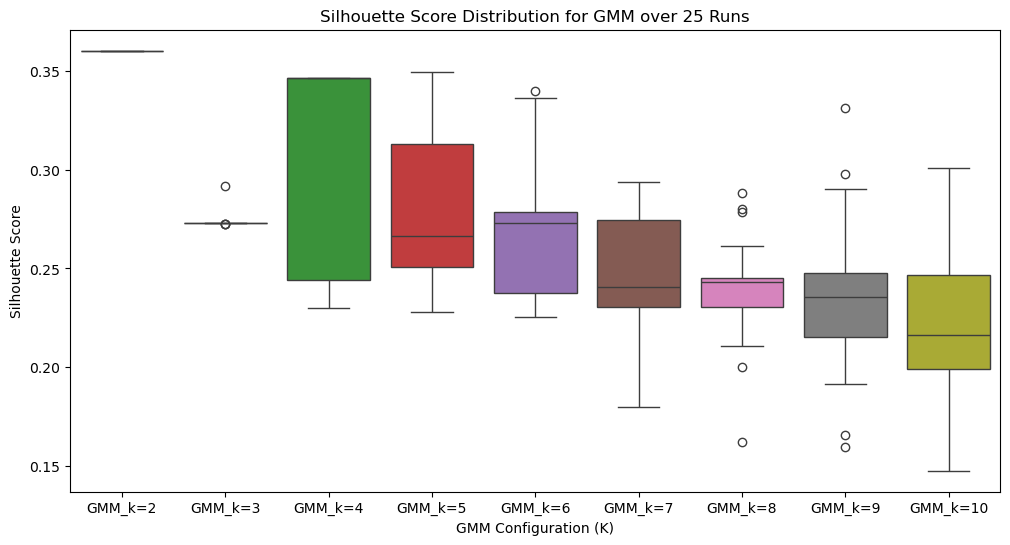

Friedman test statistic: 106.13333333333333, p-value: 2.3687978167361413e-19
Nemenyi post-hoc test results:
              0         1         2         3         4             5  \
0  1.000000e+00  0.002806  0.043240  0.000149  0.000002  2.764679e-09   
1  2.806422e-03  1.000000  0.997529  0.999115  0.832052  1.940407e-01   
2  4.323972e-02  0.997529  1.000000  0.879952  0.327541  2.243644e-02   
3  1.492770e-04  0.999115  0.879952  1.000000  0.994111  6.062865e-01   
4  1.573168e-06  0.832052  0.327541  0.994111  1.000000  9.827748e-01   
5  2.764679e-09  0.194041  0.022436  0.606287  0.982775  1.000000e+00   
6  2.547462e-11  0.031365  0.001846  0.194041  0.744267  9.991153e-01   
7  5.508927e-12  0.015832  0.000770  0.118610  0.606287  9.941107e-01   
8  5.107026e-15  0.000489  0.000011  0.007576  0.118610  7.114910e-01   

              6             7             8  
0  2.547462e-11  5.508927e-12  5.107026e-15  
1  3.136501e-02  1.583228e-02  4.890576e-04  
2  1.846015e-03  7.7048

In [19]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load and preprocess dataset
data = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")
data = data.drop('Cell Number', axis=1)
X = data.select_dtypes(include=[np.number]).values

# Scale features using MinMaxScaler (better for GMM)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define different cluster values (K = 1 to 10)
k_values = list(range(1, 11))  # 1 to 10
n_runs = 25  # Number of random runs

# Dictionary to store Silhouette Scores
silhouette_scores = {f'GMM_k={k}': [] for k in k_values if k > 1}  # Skip k=1 for silhouette

for run in range(n_runs):
    for k in k_values:
        gmm = GaussianMixture(n_components=k, covariance_type="diag", max_iter=500, random_state=run)
        labels = gmm.fit_predict(X_scaled)

        if k > 1 and len(set(labels)) > 1:  # Only calculate Silhouette if more than 1 cluster
            score = silhouette_score(X_scaled, labels)
            silhouette_scores[f'GMM_k={k}'].append(score)
        elif k > 1:
            silhouette_scores[f'GMM_k={k}'].append(np.nan)  # Avoid single-cluster error

# Convert to DataFrame and drop NaN values
silhouette_df = pd.DataFrame(silhouette_scores)
silhouette_df.dropna(inplace=True)

# Ensure there is enough valid data for statistical tests
if silhouette_df.shape[0] > 0:
    # Plot the distribution of Silhouette Scores
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=silhouette_df)
    plt.title(f'Silhouette Score Distribution for GMM over {n_runs} Runs')
    plt.xlabel('GMM Configuration (K)')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Perform the Friedman test if enough valid scores exist
    if silhouette_df.shape[0] > 2:
        stat, p_value = friedmanchisquare(*[silhouette_df[config] for config in silhouette_df.columns])
        print(f'Friedman test statistic: {stat}, p-value: {p_value}')

        # If p-value is significant, perform Nemenyi post-hoc test
        if p_value < 0.05:
            from scikit_posthocs import posthoc_nemenyi_friedman
            nemenyi_results = posthoc_nemenyi_friedman(silhouette_df.values)
            print('Nemenyi post-hoc test results:')
            print(nemenyi_results)
        else:
            print('No significant differences found among the GMM configurations.')
    else:
        print("Not enough valid data for Friedman test.")
else:
    print("Not enough valid data for analysis.")



    

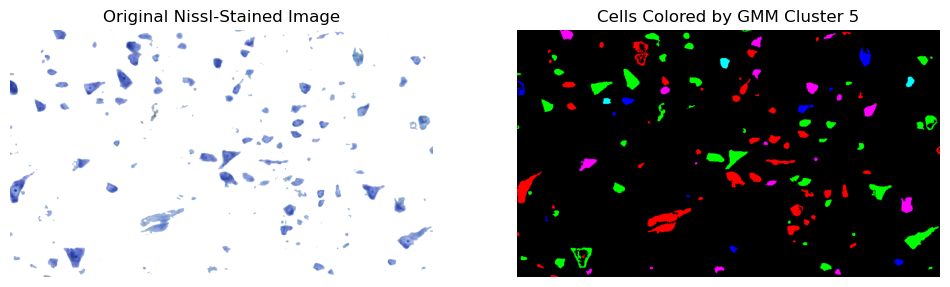

In [27]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load cell feature data for clustering
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
df = pd.read_csv(csv_path)

# Drop non-numeric columns (if any) & scale features
df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Train Gaussian Mixture Model (GMM) for clustering
num_clusters = 5  # Adjust based on your data
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM cluster labels to the dataframe
df["Cluster"] = gmm_labels

# Save new CSV with GMM labels
df.to_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv", index=False)

# Load the Nissl-stained image
image = cv2.imread("restored_white_background_debug-Copy1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# **Filter out small contours (noise)**
filtered_contours = [c for c in contours if cv2.contourArea(c) > 42]  # Adjust threshold

num_detected_cells = len(filtered_contours)
num_csv_cells = len(df)

# Warn if mismatch occurs, but continue processing
if num_detected_cells != num_csv_cells:
    print(f"⚠️ Warning: Detected {num_detected_cells} cells, but CSV has {num_csv_cells} rows.")
    min_cells = min(num_detected_cells, num_csv_cells)  # Use minimum to avoid errors
else:
    min_cells = num_detected_cells

# Read GMM cluster labels from CSV
clusters = df['Cluster'].values[:min_cells]  # Ensure alignment

# Assign unique colors to each cluster (Generate random colors for extra clusters)
fixed_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255), # Magenta
    5: (0, 255, 255)  # Cyan
}

# Auto-generate colors for unexpected cluster numbers
def get_cluster_color(cluster_id):
    if cluster_id in fixed_colors:
        return fixed_colors[cluster_id]
    else:
        return tuple(random.randint(0, 255) for _ in range(3))  # Random color

# Create an empty color image
clustered_image = np.zeros_like(image)

# Draw each detected cell with its corresponding cluster color
for i in range(min_cells):  # Avoid out-of-bounds errors
    cluster_id = clusters[i]  # Get cluster ID for this cell
    color = get_cluster_color(cluster_id)  # Get or generate color
    cv2.drawContours(clustered_image, [filtered_contours[i]], -1, color, thickness=cv2.FILLED)

# Show original and clustered images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Nissl-Stained Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cells Colored by GMM Cluster 5")
ax[1].axis("off")

plt.show()


✅ Saved clustered image with 5 clusters to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png


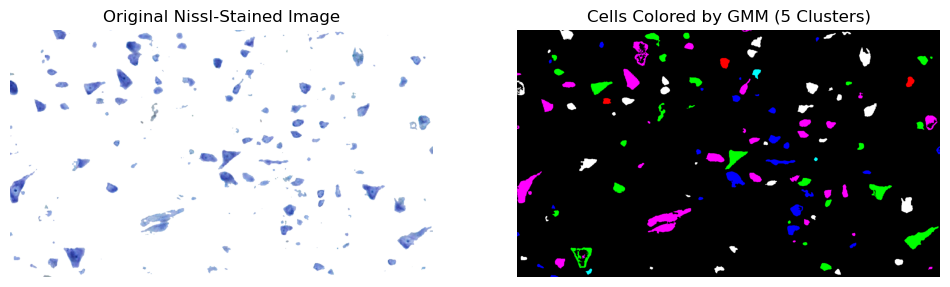

In [149]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load cluster data from CSV
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm.csv"
df = pd.read_csv(csv_path)

# Ensure 'Cluster' column exists
if 'Cluster' not in df.columns:
    raise KeyError("CSV must have a 'Cluster' column!")

# Load and preprocess the Nissl-stained image
image = cv2.imread("restored_white_background_debug-Copy1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (noise)
filtered_contours = [c for c in contours if cv2.contourArea(c) > 42]  

num_detected_cells = len(filtered_contours)

# Validate cell count
if num_detected_cells != len(df):
    raise ValueError(f"Mismatch: Detected {num_detected_cells} cells, but CSV has {len(df)} rows.")

# Read cluster labels from CSV
clusters = df['Cluster'].values  

# Define unique colors for **5 clusters**
cluster_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255),} # Magenta

# Create an empty color image
clustered_image = np.zeros_like(image)

# Draw each detected cell with its corresponding cluster color
for i, contour in enumerate(filtered_contours):
    cluster_id = clusters[i]  
    color = cluster_colors.get(cluster_id, (255, 255, 255))  # Default to white if cluster not found
    cv2.drawContours(clustered_image, [contour], -1, color, thickness=cv2.FILLED)

# Save the final clustered image
output_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"
cv2.imwrite(output_path, clustered_image)
print(f"✅ Saved clustered image with 5 clusters to {output_path}")

# Show original and clustered images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Nissl-Stained Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cells Colored by GMM (5 Clusters)")
ax[1].axis("off")

plt.show()




In [45]:
print("Columns in DataFrame:", data.columns.tolist())

Columns in DataFrame: ['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity', 'Local Homogeneity']


In [53]:
import cv2
import numpy as np
import os

# Define GMM cluster colors in BGR format (for 5 clusters)
cluster_colors = {
    0: (255, 0, 0),   # Red
    1: (0, 255, 0),   # Green
    2: (0, 0, 255),   # Blue
    3: (255, 255, 0), # Yellow
    4: (255, 0, 255)  # Magenta
}

def extract_cluster_masks(image, cluster_colors, output_folder):
    """
    Extracts and saves masks for each cluster based on predefined colors.

    :param image: Input Nissl-stained image with color-coded clusters.
    :param cluster_colors: Dictionary mapping cluster labels to BGR color values.
    :param output_folder: Directory to save the segmented cluster images.
    """
    os.makedirs(output_folder, exist_ok=True)

    if image is None:
        print("❌ Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image successfully loaded with shape: {image.shape}")

    for cluster_id, (b, g, r) in cluster_colors.items():
        # Set flexible lower & upper bounds per channel
        lower_bound = np.array([max(b - 25, 0), max(g - 25, 0), max(r - 25, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + 25, 255), min(g + 25, 255), min(r + 25, 255)], dtype=np.uint8)

        print(f"🔹 Processing cluster {cluster_id}: Color=(B={b}, G={g}, R={r}), Lower={lower_bound}, Upper={upper_bound}")

        # Create a mask for the cluster
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No pixels found for cluster {cluster_id}!")
            continue

        # Apply the mask to extract cluster region
        cluster_cells = cv2.bitwise_and(image, image, mask=mask)

        # Save extracted cluster image
        output_path = os.path.join(output_folder, f"cluster_{cluster_id}.png")
        cv2.imwrite(output_path, cluster_cells)
        print(f"✅ Saved segmented cluster {cluster_id} to {output_path}")

# Load the GMM-clustered image
image_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"
image = cv2.imread(image_path)

# Define output folder for GMM clusters
output_folder = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells storage"

# Extract and save clusters
extract_cluster_masks(image, cluster_colors, output_folder)


✅ Image successfully loaded with shape: (854, 1460, 3)
🔹 Processing cluster 0: Color=(B=255, G=0, R=0), Lower=[230   0   0], Upper=[255  25  25]
✅ Saved segmented cluster 0 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells storage\cluster_0.png
🔹 Processing cluster 1: Color=(B=0, G=255, R=0), Lower=[  0 230   0], Upper=[ 25 255  25]
✅ Saved segmented cluster 1 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells storage\cluster_1.png
🔹 Processing cluster 2: Color=(B=0, G=0, R=255), Lower=[  0   0 230], Upper=[ 25  25 255]
✅ Saved segmented cluster 2 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells storage\cluster_2.png
🔹 Processing cluster 3: Color=(B=255, G=255, R=0), Lower=[230 230   0], Upper=[255 255  25]
✅ Saved segmented cluster 3 to C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells storage\cluster_3.png
🔹 Processing cluste

In [55]:
import cv2
import numpy as np
import os

# Define GMM cluster colors in BGR format (5 clusters)
cluster_colors = {
    "red": (0, 0, 255),
    "green": (0, 255, 0),
    "blue": (255, 0, 0),
    "yellow": (0, 255, 255),
    "magenta": (255, 0, 255)
}

def extract_cluster_masks(image, cluster_colors, output_base_folder):
    """
    Extracts and saves individual segmented cells for each cluster color.

    :param image: Input Nissl-stained image with color-coded clusters.
    :param cluster_colors: Dictionary mapping color names to BGR values.
    :param output_base_folder: Directory to save the segmented cell images.
    """
    os.makedirs(output_base_folder, exist_ok=True)

    if image is None:
        print("❌ Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image successfully loaded: {image.shape}")

    for color_name, (b, g, r) in cluster_colors.items():
        # Create a folder for each color (cluster)
        folder = os.path.join(output_base_folder, color_name)
        os.makedirs(folder, exist_ok=True)

        # Define color range with a ±20 tolerance
        lower_bound = np.array([max(b - 20, 0), max(g - 20, 0), max(r - 20, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + 20, 255), min(g + 20, 255), min(r + 20, 255)], dtype=np.uint8)

        print(f"🔹 Processing {color_name} cells...")

        # Create a mask for the specific color
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No cells found for {color_name}!")
            continue

        # Find individual cell contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, cnt in enumerate(contours):
            x, y, w, h = cv2.boundingRect(cnt)
            cell_crop = image[y:y+h, x:x+w]  # Crop cell from image

            # Save each extracted cell
            filename = os.path.join(folder, f"{color_name}_cell_{idx}.png")
            cv2.imwrite(filename, cell_crop)

        print(f"✅ Extracted {len(contours)} {color_name} cells into {folder}")

# Load the GMM-clustered image
image_path =  r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"
image = cv2.imread(image_path)

# Define output folder for individual GMM cluster cells
output_base_folder = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells individual"

# Run extraction
extract_cluster_masks(image, cluster_colors, output_base_folder)


✅ Image successfully loaded: (854, 1460, 3)
🔹 Processing red cells...
✅ Extracted 3 red cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells individual\red
🔹 Processing green cells...
✅ Extracted 26 green cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells individual\green
🔹 Processing blue cells...
✅ Extracted 24 blue cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells individual\blue
🔹 Processing yellow cells...
⚠️ Warning: No cells found for yellow!
🔹 Processing magenta cells...
✅ Extracted 32 magenta cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM cluster cells individual\magenta


In [57]:
import cv2
import numpy as np
import os

# Define cluster colors in BGR format (OpenCV uses BGR, not RGB)
cluster_colors = {
    "red": (0, 0, 255),
    "green": (0, 255, 0),
    "blue": (255, 0, 0),
    "yellow": (0, 255, 255),
    "magenta": (255, 0, 255),
    "cyan": (255, 255, 0),
    
}

def extract_cluster_masks(image, cluster_colors, output_base_folder, tolerance=30):
    """
    Extracts and saves individual cluster cell images.

    :param image: Input clustered image.
    :param cluster_colors: Dictionary of cluster colors in BGR format.
    :param output_base_folder: Folder to store extracted clusters.
    :param tolerance: Color tolerance for better detection.
    """
    os.makedirs(output_base_folder, exist_ok=True)

    if image is None:
        print("Error: Image not loaded! Check the file path.")
        return

    print(f"✅ Image loaded successfully: {image.shape}")

    for color_name, (b, g, r) in cluster_colors.items():
        # Create a folder for each cluster color
        folder = os.path.join(output_base_folder, color_name)
        os.makedirs(folder, exist_ok=True)

        # Define flexible color range
        lower_bound = np.array([max(b - tolerance, 0), max(g - tolerance, 0), max(r - tolerance, 0)], dtype=np.uint8)
        upper_bound = np.array([min(b + tolerance, 255), min(g + tolerance, 255), min(r + tolerance, 255)], dtype=np.uint8)

        print(f"🔍 Processing {color_name} cells...")

        # Create a mask for the specific cluster color
        mask = cv2.inRange(image, lower_bound, upper_bound)

        if np.count_nonzero(mask) == 0:
            print(f"⚠️ Warning: No cells found for {color_name}!")
            continue

        # Find cell contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for idx, cnt in enumerate(contours):
            x, y, w, h = cv2.boundingRect(cnt)
            cell_crop = image[y:y+h, x:x+w]

            # Save extracted cell image
            filename = os.path.join(folder, f"{color_name}_cell_{idx}.png")
            cv2.imwrite(filename, cell_crop)

        print(f"✅ Extracted {len(contours)} {color_name} cells into {folder}")

# Load Image
image_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"
image = cv2.imread(image_path)

# Define output folder
output_base_folder = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual"

# Run extraction with improved tolerance
extract_cluster_masks(image, cluster_colors, output_base_folder, tolerance=30)

✅ Image loaded successfully: (854, 1460, 3)
🔍 Processing red cells...
✅ Extracted 3 red cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\red
🔍 Processing green cells...
✅ Extracted 26 green cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\green
🔍 Processing blue cells...
✅ Extracted 24 blue cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\blue
🔍 Processing yellow cells...
⚠️ Warning: No cells found for yellow!
🔍 Processing magenta cells...
✅ Extracted 32 magenta cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\magenta
🔍 Processing cyan cells...
✅ Extracted 3 cyan cells into C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\cyan


In [63]:
import os
import cv2
import numpy as np

# Base directory containing clustered cell images for GMM
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual"

# Folder names corresponding to GMM cluster colors
gmm_cluster_names = ["red", "green", "blue","magenta", "cyan"]

# Output folder for averaged images
summary_output_folder = os.path.join(output_base, "cluster_summaries")
os.makedirs(summary_output_folder, exist_ok=True)

def compute_cluster_summaries(folder_path, cluster_name):
    """Compute the average, median, and most centered image for the given folder."""
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    
    if not image_files:
        print(f"⚠️ No images found in {folder_path}. Skipping...")
        return

    images = []
    for f in image_files:
        img_path = os.path.join(folder_path, f)
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        if img is None:
            print(f"❌ Error reading image: {img_path}. Skipping...")
            continue

        images.append(img)

    if len(images) == 0:
        print(f"⚠️ No valid images in {folder_path}. Skipping...")
        return

    # Resize all images to the smallest found dimension
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]

    # Compute the average image
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)

    # Compute the median image (pixel-wise)
    median_image = np.median(np.array(images_resized), axis=0).astype(np.uint8)

    # Find the most centered image (closest to mean)
    avg_vector = avg_image.flatten()
    distances = [np.linalg.norm(img.flatten() - avg_vector) for img in images_resized]
    center_image = images_resized[np.argmin(distances)]

    # Save results
    save_avg = os.path.join(summary_output_folder, f"average_{cluster_name}.png")
    save_median = os.path.join(summary_output_folder, f"median_{cluster_name}.png")
    save_center = os.path.join(summary_output_folder, f"center_{cluster_name}.png")

    cv2.imwrite(save_avg, avg_image)
    cv2.imwrite(save_median, median_image)
    cv2.imwrite(save_center, center_image)

    print(f"✅ Saved images for {cluster_name}: [Average, Median, Center]")

# Process each GMM cluster
for cluster_name in gmm_cluster_names:
    cluster_folder = os.path.join(output_base, cluster_name)
    if os.path.exists(cluster_folder):
        compute_cluster_summaries(cluster_folder, cluster_name)
    else:
        print(f"⚠️ Folder {cluster_folder} not found!")

print("🎉 GMM Cluster Summary Generation Completed!")


✅ Saved images for red: [Average, Median, Center]
✅ Saved images for green: [Average, Median, Center]
✅ Saved images for blue: [Average, Median, Center]
✅ Saved images for magenta: [Average, Median, Center]
✅ Saved images for cyan: [Average, Median, Center]
🎉 GMM Cluster Summary Generation Completed!


In [81]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_images")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
required_columns = {'Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 'Soma Diameter', 
                    'Aspect Ratio', 'Circularity', 'Solidity', 'Local Homogeneity', 'Cluster'}
if not required_columns.issubset(df.columns):
    raise KeyError("CSV must contain all required feature columns, including 'Cluster'!")

# Get all folder names that are valid clusters (ignoring processed_images, summaries, etc.)
valid_folders = [folder for folder in os.listdir(output_base) if os.path.isdir(os.path.join(output_base, folder))]
valid_folders = [folder for folder in valid_folders if folder not in ["processed_images", "cluster_summaries"]]
print(f"✅ Available cluster folders: {valid_folders}")

# Check if the number of clusters matches the number of folders
if len(valid_folders) != df['Cluster'].nunique():
    print("⚠️ WARNING: Number of cluster folders does not match unique cluster values in CSV!")

# Automatically map numeric clusters to folder names
cluster_mapping = {num: color for num, color in zip(sorted(df['Cluster'].unique()), sorted(valid_folders))}
print(f"🗂️ Mapped Clusters: {cluster_mapping}")

# Function to compute average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Function to find closest matching image by feature
def get_closest_image(cluster_folder, cluster_df, reference_value, feature_name):
    image_files = sorted([f for f in os.listdir(cluster_folder) if f.endswith(".png")])
    if not image_files:
        return None
    
    # Compute absolute difference from reference value
    cluster_df['Feature_Diff'] = abs(cluster_df[feature_name] - reference_value)
    closest_idx = cluster_df.sort_values('Feature_Diff').index[0]
    
    # Safely map index to image files
    closest_image_path = os.path.join(cluster_folder, image_files[closest_idx % len(image_files)])
    return cv2.imread(closest_image_path, cv2.IMREAD_UNCHANGED)

# Process each mapped cluster
for cluster_id, cluster_name in cluster_mapping.items():
    if cluster_name in valid_folders:
        cluster_folder = os.path.join(output_base, cluster_name)
        cluster_df = df[df['Cluster'] == cluster_id]

        if not cluster_df.empty:
            avg_image = compute_average_image(cluster_folder)
            center_image = get_closest_image(cluster_folder, cluster_df, cluster_df['Area'].mean(), 'Area')
            median_image = get_closest_image(cluster_folder, cluster_df, cluster_df['Area'].median(), 'Area')

            # Save images
            if avg_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"average_{cluster_name}.png"), avg_image)
            if center_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"center_{cluster_name}.png"), center_image)
            if median_image is not None:
                cv2.imwrite(os.path.join(processed_output_folder, f"median_{cluster_name}.png"), median_image)
            print(f"✅ Processed images for cluster '{cluster_name}'")
        else:
            print(f"⚠️ No data found in CSV for cluster '{cluster_name}'!")
    else:
        print(f"⚠️ Folder for cluster '{cluster_name}' not found!")

print("🎉 Processing completed!")





✅ Available cluster folders: ['blue', 'cyan', 'green', 'magenta', 'red']
🗂️ Mapped Clusters: {0: 'blue', 1: 'cyan', 2: 'green', 3: 'magenta', 4: 'red'}
✅ Processed images for cluster 'blue'
✅ Processed images for cluster 'cyan'
✅ Processed images for cluster 'green'
✅ Processed images for cluster 'magenta'
✅ Processed images for cluster 'red'
🎉 Processing completed!


In [85]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_data")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv"
df = pd.read_csv(csv_path)

# Cluster mapping (Number -> Color)
cluster_mapping = {0: "blue", 1: "cyan", 2: "green", 3: "magenta", 4: "red"}
available_clusters = {color: os.path.join(output_base, color) for color in cluster_mapping.values()}

print(f"✅ Available cluster folders: {list(available_clusters.keys())}")

# Function to compute the average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Function to find the center and median cell images
def get_specific_images(cluster_folder, cluster_df):
    image_files = sorted([f for f in os.listdir(cluster_folder) if f.endswith(".png")])
    if not image_files:
        return None, None

    # Get center image (closest to mean Area)
    mean_area = cluster_df['Area'].mean()
    cluster_df['Area_Diff'] = abs(cluster_df['Area'] - mean_area)
    center_idx = cluster_df.sort_values('Area_Diff').index[0]
    center_image_path = os.path.join(cluster_folder, image_files[center_idx % len(image_files)])
    center_image = cv2.imread(center_image_path, cv2.IMREAD_UNCHANGED)

    # Get median image
    median_idx = cluster_df['Area'].median()
    cluster_df['Median_Diff'] = abs(cluster_df['Area'] - median_idx)
    median_idx = cluster_df.sort_values('Median_Diff').index[0]
    median_image_path = os.path.join(cluster_folder, image_files[median_idx % len(image_files)])
    median_image = cv2.imread(median_image_path, cv2.IMREAD_UNCHANGED)

    return center_image, median_image

# Process each cluster
for cluster_id, color_name in cluster_mapping.items():
    cluster_folder = available_clusters.get(color_name)
    if not os.path.exists(cluster_folder):
        print(f"⚠️ Folder for cluster '{color_name}' not found!")
        continue

    # Get feature data for the current cluster
    cluster_df = df[df['Cluster'] == cluster_id]
    if cluster_df.empty:
        print(f"⚠️ No data found in CSV for cluster '{color_name}'!")
        continue

    print(f"✅ Processing cluster '{color_name}'")

    # Compute images
    avg_image = compute_average_image(cluster_folder)
    center_image, median_image = get_specific_images(cluster_folder, cluster_df)

    # Save images
    if avg_image is not None:
        cv2.imwrite(os.path.join(processed_output_folder, f"average_cluster_{color_name}.png"), avg_image)

    if center_image is not None:
        cv2.imwrite(os.path.join(processed_output_folder, f"center_cluster_{color_name}.png"), center_image)

    if median_image is not None:
        cv2.imwrite(os.path.join(processed_output_folder, f"median_cluster_{color_name}.png"), median_image)

    # Save features as CSV
    feature_csv_path = os.path.join(processed_output_folder, f"features_cluster_{color_name}.csv")
    cluster_df.to_csv(feature_csv_path, index=False)
    print(f"📄 Saved feature data for cluster '{color_name}' as CSV!")

print("🎉 Processing completed!")


✅ Available cluster folders: ['blue', 'cyan', 'green', 'magenta', 'red']
✅ Processing cluster 'blue'
📄 Saved feature data for cluster 'blue' as CSV!
✅ Processing cluster 'cyan'
📄 Saved feature data for cluster 'cyan' as CSV!
✅ Processing cluster 'green'
📄 Saved feature data for cluster 'green' as CSV!
✅ Processing cluster 'magenta'
📄 Saved feature data for cluster 'magenta' as CSV!
✅ Processing cluster 'red'
📄 Saved feature data for cluster 'red' as CSV!
🎉 Processing completed!


In [100]:
import os
import cv2
import numpy as np
import pandas as pd

# Base directory containing clustered cell images
output_base = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual"

# Output folder for processed images
processed_output_folder = os.path.join(output_base, "processed_images")
os.makedirs(processed_output_folder, exist_ok=True)

# Load CSV containing cell features
csv_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
required_columns = {'Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length', 
                    'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity', 
                    'Local Homogeneity', 'Cluster'}
if not required_columns.issubset(df.columns):
    raise KeyError("CSV must contain all required feature columns, including 'Cluster'!")

# Map numerical cluster IDs to folder names
cluster_mapping = {0: "blue", 1: "cyan", 2: "green", 3: "magenta", 4: "red"}

# Function to compute average image
def compute_average_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
    if not image_files:
        return None
    images = [cv2.imread(os.path.join(folder_path, f), cv2.IMREAD_UNCHANGED) for f in image_files]
    min_shape = min((img.shape[:2] for img in images), key=lambda x: x[0] * x[1])
    images_resized = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    avg_image = np.mean(images_resized, axis=0).astype(np.uint8)
    return avg_image

# Function to find center and median cell images and their indices
def get_specific_images(cluster_folder, cluster_df):
    image_files = sorted([f for f in os.listdir(cluster_folder) if f.endswith(".png")])
    if not image_files or cluster_df.empty:
        return None, None, None, None
    
    # Get center image (closest to mean Area)
    mean_area = cluster_df['Area'].mean()
    cluster_df['Area_Diff'] = abs(cluster_df['Area'] - mean_area)
    center_idx = cluster_df.sort_values('Area_Diff').index[0]  # Correct index handling
    
    center_image_path = os.path.join(cluster_folder, image_files[min(center_idx, len(image_files)-1)])
    center_image = cv2.imread(center_image_path, cv2.IMREAD_UNCHANGED)
    
    # Get median image
    median_value = cluster_df['Area'].median()
    cluster_df['Median_Diff'] = abs(cluster_df['Area'] - median_value)
    median_idx = cluster_df.sort_values('Median_Diff').index[0]  # Correct index handling
    
    median_image_path = os.path.join(cluster_folder, image_files[min(median_idx, len(image_files)-1)])
    median_image = cv2.imread(median_image_path, cv2.IMREAD_UNCHANGED)
    
    return center_image, median_image, center_idx, median_idx

# Data storage for Excel
all_feature_data = pd.DataFrame()

# Process each cluster
for cluster_id, color_name in cluster_mapping.items():
    cluster_folder = os.path.join(output_base, color_name)
    cluster_df = df[df['Cluster'] == cluster_id]

    if os.path.exists(cluster_folder):
        avg_image = compute_average_image(cluster_folder)
        center_image, median_image, center_idx, median_idx = get_specific_images(cluster_folder, cluster_df)
        
        if avg_image is not None:
            cv2.imwrite(os.path.join(processed_output_folder, f"average_cluster_{color_name}.png"), avg_image)
        if center_image is not None:
            cv2.imwrite(os.path.join(processed_output_folder, f"center_cluster_{color_name}.png"), center_image)
        if median_image is not None:
            cv2.imwrite(os.path.join(processed_output_folder, f"median_cluster_{color_name}.png"), median_image)

        # Extract feature data for the entire cluster
        feature_data = cluster_df[['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length',
                                   'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity', 'Local Homogeneity']]
        
        # Compute average, center, and median feature values
        avg_features = feature_data.mean().to_frame().T
        median_features = feature_data.median().to_frame().T

        # ✅ FIX: Use .loc[] instead of .iloc[] for center features
        if center_idx in feature_data.index:
            center_features = feature_data.loc[[center_idx]].reset_index(drop=True)
        else:
            center_features = pd.DataFrame(columns=feature_data.columns)  # Empty if index doesn't exist

        # Add cluster info
        avg_features.insert(0, "Cluster", color_name)
        median_features.insert(0, "Cluster", color_name)
        center_features.insert(0, "Cluster", color_name)

        # 🔥 **NEW**: Add feature type column
        avg_features.insert(1, "Feature Type", "Average")
        median_features.insert(1, "Feature Type", "Median")
        center_features.insert(1, "Feature Type", "Center")

        # Append to all data
        all_feature_data = pd.concat([all_feature_data, avg_features, median_features, center_features], ignore_index=True)

    else:
        print(f"⚠️ Folder for cluster '{color_name}' not found!")

# Save to Excel
excel_output_path = os.path.join(output_base, "cluster_feature_summary.xlsx")
all_feature_data.to_excel(excel_output_path, index=False)
print(f"✅ Cluster feature summary saved at {excel_output_path}")

print("🎉 Processing completed!")


    


✅ Cluster feature summary saved at C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\GMM1 cluster cells individual\cluster_feature_summary.xlsx
🎉 Processing completed!


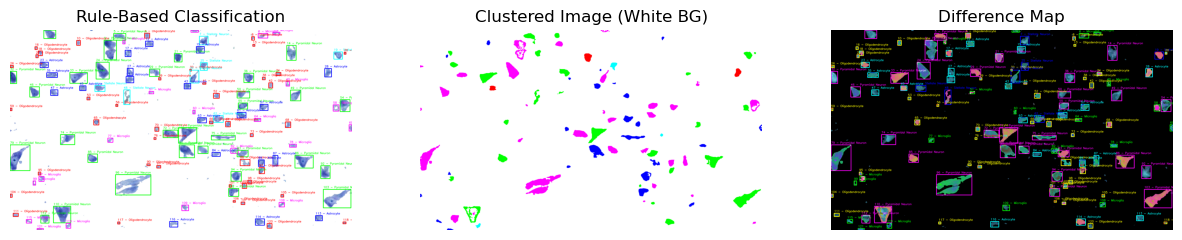

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
rule_based_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\final_classified_nissl_cells.png" # Update with actual path
clustered_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\clustered_nissl_image_gmm_5clusters.png"  # Update with actual path

rule_based = cv2.imread(rule_based_path)
clustered = cv2.imread(clustered_path)

# Ensure images are loaded
if rule_based is None or clustered is None:
    raise ValueError("One or both images could not be loaded. Check file paths.")

# Resize images to match dimensions
if rule_based.shape[:2] != clustered.shape[:2]:
    clustered = cv2.resize(clustered, (rule_based.shape[1], rule_based.shape[0]))

# Convert black background to white in the clustered image (invert colors)
gray_clustered = cv2.cvtColor(clustered, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_clustered, 10, 255, cv2.THRESH_BINARY)  # Detect foreground
white_bg = np.full_like(clustered, 255)  # Create a white background
clustered_white_bg = np.where(mask[:, :, None] > 0, clustered, white_bg)  # Apply mask

# Compute absolute color difference
diff = cv2.absdiff(rule_based, clustered_white_bg)

# Display images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rule_based, cv2.COLOR_BGR2RGB))
plt.title("Rule-Based Classification")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(clustered_white_bg, cv2.COLOR_BGR2RGB))
plt.title("Clustered Image (White BG)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap="hot")
plt.title("Difference Map")
plt.axis("off")

plt.show()


In [156]:
print("GMM DataFrame Columns:", gmm_df.columns)
print("Rule-Based DataFrame Columns:", rule_df.columns)


GMM DataFrame Columns: Index(['Cell Number', 'Area', 'Perimeter', 'Major Axis Length',
       'Minor Axis Length', 'Soma Diameter', 'Aspect Ratio', 'Circularity',
       'Solidity', 'Local Homogeneity', 'Cluster'],
      dtype='object')
Rule-Based DataFrame Columns: Index(['Cell Number', 'Area', 'Perimeter', 'Major Axis Length',
       'Minor Axis Length', 'Soma Diameter', 'Aspect Ratio', 'Circularity',
       'Solidity', 'Local Homogeneity'],
      dtype='object')


In [158]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ks_2samp, ttest_ind

# Load DataFrames (Modify paths as needed)
gmm_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv")  # GMM-based classification data
rule_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")  # Rule-based classification data

# Ensure common cells for fair comparison
common_cells = set(gmm_df["Cell Number"]) & set(rule_df["Cell Number"])
gmm_df = gmm_df[gmm_df["Cell Number"].isin(common_cells)]
rule_df = rule_df[rule_df["Cell Number"].isin(common_cells)]

# Define numerical features for comparison
features = ["Area", "Perimeter", "Aspect Ratio", "Circularity", "Solidity"]

# Perform statistical tests
results = []
for feature in features:
    u_stat, p_u = mannwhitneyu(gmm_df[feature], rule_df[feature])
    ks_stat, p_ks = ks_2samp(gmm_df[feature], rule_df[feature])
    t_stat, p_t = ttest_ind(gmm_df[feature], rule_df[feature], equal_var=False)
    
    results.append([feature, u_stat, p_u, ks_stat, p_ks, t_stat, p_t])

# Convert results to a DataFrame and print
stats_df = pd.DataFrame(results, columns=["Feature", "Mann-Whitney U", "p-value (U)", 
                                          "KS Statistic", "p-value (KS)",
                                          "T Statistic", "p-value (T)"])
print(stats_df)

# Save results to CSV
stats_df.to_csv("statistical_comparison_gmm_vs_rule.csv", index=False)


        Feature  Mann-Whitney U  p-value (U)  KS Statistic  p-value (KS)  \
0          Area          7320.5          1.0      0.000000           1.0   
1     Perimeter          7320.5          1.0      0.000000           1.0   
2  Aspect Ratio          7321.0          1.0      0.008264           1.0   
3   Circularity          7320.5          1.0      0.000000           1.0   
4      Solidity          7320.5          1.0      0.000000           1.0   

   T Statistic  p-value (T)  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


In [160]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu, ks_2samp, ttest_ind
from sklearn.metrics import cohen_kappa_score

# Load GMM and Rule-Based Classification Data
gmm_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv")        # Update with your file path
rule_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv")  # Update with your file path

# Merge datasets based on common cell numbers for fair comparison
common_cells = set(gmm_df["Cell Number"]) & set(rule_df["Cell Number"])
gmm_df = gmm_df[gmm_df["Cell Number"].isin(common_cells)]
rule_df = rule_df[rule_df["Cell Number"].isin(common_cells)]

# Sort by 'Cell Number' to align the data rows
gmm_df = gmm_df.sort_values("Cell Number").reset_index(drop=True)
rule_df = rule_df.sort_values("Cell Number").reset_index(drop=True)

# Define numerical features you want to compare
features = ["Area", "Perimeter", "Major Axis Length", "Minor Axis Length",
            "Soma Diameter", "Aspect Ratio", "Circularity", "Solidity"]

# Dictionary to store test results
test_results = {}

# ------------------------------
# 1. Feature Distribution Comparisons
# ------------------------------
for feature in features:
    # Mann-Whitney U Test (non-parametric test for difference in distributions)
    u_stat, p_u = mannwhitneyu(gmm_df[feature], rule_df[feature], alternative="two-sided")
    test_results[f"Mann-Whitney {feature}"] = (u_stat, p_u)
    
    # Kolmogorov-Smirnov Test (compares overall distribution differences)
    ks_stat, p_ks = ks_2samp(gmm_df[feature], rule_df[feature])
    test_results[f"KS Test {feature}"] = (ks_stat, p_ks)
    
    # T-Test (compares means, assuming approximate normality; use Welch’s if variances differ)
    t_stat, p_t = ttest_ind(gmm_df[feature], rule_df[feature], equal_var=False)
    test_results[f"T-Test {feature}"] = (t_stat, p_t)

# ------------------------------
# 2. Label/Classification Comparisons
# ------------------------------
# Make sure that the rule-based classification has "Cell Type" and the GMM has "Cluster"
if "Cell Type" in rule_df.columns and "Cluster" in gmm_df.columns:
    # Cohen's Kappa for agreement between categorical labels
    kappa_score = cohen_kappa_score(gmm_df["Cluster"], rule_df["Cell Type"])
    test_results["Cohen's Kappa"] = (kappa_score, None)  # No p-value for Kappa
    
    # Chi-Square Test for association between GMM clusters and rule-based cell types
    contingency_table = pd.crosstab(gmm_df["Cluster"], rule_df["Cell Type"])
    chi2_stat, p_chi2, dof, expected = chi2_contingency(contingency_table)
    test_results["Chi-Square Test"] = (chi2_stat, p_chi2)

# Convert all test results into a DataFrame for a clear summary
results_df = pd.DataFrame(test_results, index=["Statistic", "p-value"]).T
print("----- Statistical Test Summary -----")
print(results_df)

# Optionally, save the results to a CSV file for later review
results_df.to_csv("gmm_vs_rule_based_stats.csv", index=True)


----- Statistical Test Summary -----
                                  Statistic   p-value
Mann-Whitney Area               7320.500000  1.000000
KS Test Area                       0.000000  1.000000
T-Test Area                        0.000000  1.000000
Mann-Whitney Perimeter          7320.500000  1.000000
KS Test Perimeter                  0.000000  1.000000
T-Test Perimeter                   0.000000  1.000000
Mann-Whitney Major Axis Length  7321.500000  0.999267
KS Test Major Axis Length          0.008264  1.000000
T-Test Major Axis Length           0.000000  1.000000
Mann-Whitney Minor Axis Length  7320.500000  1.000000
KS Test Minor Axis Length          0.008264  1.000000
T-Test Minor Axis Length           0.000000  1.000000
Mann-Whitney Soma Diameter      7322.000000  0.998535
KS Test Soma Diameter              0.008264  1.000000
T-Test Soma Diameter               0.000000  1.000000
Mann-Whitney Aspect Ratio       7321.000000  1.000000
KS Test Aspect Ratio               0.008264  

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.metrics import cohen_kappa_score

# Load GMM and Rule-Based Classification Data
gmm_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_clustered_gmm3.csv")
rule_df = pd.read_csv(r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\moved_files\data cell.csv")

# Merge based on common cell numbers for fair comparison
common_cells = set(gmm_df["Cell Number"]) & set(rule_df["Cell Number"])
gmm_df = gmm_df[gmm_df["Cell Number"].isin(common_cells)]
rule_df = rule_df[rule_df["Cell Number"].isin(common_cells)]

# Sort by 'Cell Number' to align the data rows
gmm_df = gmm_df.sort_values("Cell Number").reset_index(drop=True)
rule_df = rule_df.sort_values("Cell Number").reset_index(drop=True)

# Check if the required columns exist in both datasets
if "Cluster" in gmm_df.columns and "Cell Type" in rule_df.columns:
    # Convert both label columns to strings for consistency
    gmm_labels = gmm_df["Cluster"].astype(str)
    rule_labels = rule_df["Cell Type"].astype(str)
    
    # 1. Cohen's Kappa for classification agreement
    kappa_score = cohen_kappa_score(gmm_labels, rule_labels)
    print("Cohen's Kappa Score:", kappa_score)

    # 2. Chi-Square Test for association between GMM clusters and rule-based cell types
    contingency_table = pd.crosstab(gmm_labels, rule_labels)
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    print("Chi-Square Statistic:", chi2_stat)
    print("p-value:", p_val)

    # Interpretation message based on p-value
    if p_val < 0.05:
        print("There is a significant association between GMM clusters and rule-based cell types.")
    else:
        print("There is no significant association between GMM clusters and rule-based cell types.")
else:
    print("Required columns not found in one or both datasets.")


Cohen's Kappa Score: 0.0
Chi-Square Statistic: 148.6200317747872
p-value: 1.4614675443000027e-23
There is a significant association between GMM clusters and rule-based cell types.


In [29]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Convert labels to string for consistency (if not already)
gmm_labels = gmm_df["Cluster"].astype(str)
rule_labels = rule_df["Cell Type"].astype(str)

# Calculate Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = adjusted_rand_score(rule_labels, gmm_labels)
nmi = normalized_mutual_info_score(rule_labels, gmm_labels)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


Adjusted Rand Index (ARI): 0.4263443504661271
Normalized Mutual Information (NMI): 0.46231612883468


In [170]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan


In [176]:
import os
print(os.listdir())


['        Agglomerative Clustering (Hierarchical Clustering)5.ipynb', '.ipynb_checkpoints', 'AC.csv', 'Affinity Propagation(9).ipynb', 'Brain Lab', 'clustered_nissl_image.png', 'clustered_nissl_image_gmm.png', 'clustered_nissl_image_gmm_5clusters.png', 'data cell (6).xls', 'data cell-Copy1.csv', 'data cell.csv', 'data_cell_clustered kmeans.csv', 'data_cell_clustered.csv', 'data_cell_clustered_gmm.csv', 'data_cell_clustered_gmm1.csv', 'data_cell_clustered_gmm2.csv', 'data_cell_clustered_gmm3.csv', 'data_cell_for_clustering.csv', 'data_cell_for_clustering_kmedoids_optimized.csv', 'data_cell_for_spectralclustering.csv', 'data_cell_gmm_clustered.csv', 'DBSCAN  (Density-Based Spatial Clustering of Applications with Noise) (4).ipynb', 'difference_image.png', 'final_classified_nissl_cells.png', 'Gaussian Mixture Model (GMM)(2)\u200b.ipynb', 'GMM cluster cells individual', 'GMM cluster cells storage', 'GMM1 cluster cells individual', 'gmm_vs_rule_based_stats.csv', 'HDBSCAN (Hierarchical Densit

In [186]:
import os

directory = "/mnt/data"
files = os.listdir(directory)
print("Files in", directory, ":", files)

# If your file is there, get its absolute path
if "data cell.csv" in files:
    file_path = os.path.join(directory, "data cell (6).xls")
    print("Real path of the file:", os.path.abspath(file_path))
else:
    print("File not found in", directory)


Files in /mnt/data : ['cell_1_classification_pie_chart.png', 'cell_2_classification_pie_chart.png', 'cell_3_classification_pie_chart.png', 'cell_classifications_with_probabilities.csv', 'cell_classifications_with_top_5_probabilities.csv', 'cell_features.csv', 'classification_comparison.csv', 'classified_cells.png', 'classified_cells_top5.csv', 'classified_nissl_cells.png', 'cnn_classified_cells.png', 'final_classified_cells_with_probabilities.png', 'final_classified_nissl_cells.png', 'final_classified_nissl_cells_no_entropy.png', 'final_classified_nissl_cells_no_intensity.png', 'final_classified_nissl_cells_updated.png', 'final_classified_with_probabilities.png', 'final_fuzzy_classified.png', 'final_nb_classified.png', 'final_probabilistic_nissl_cells.png', 'final_rule_based_nissl_cells.png', 'fixed_classified_nissl_cells.png', 'labeled_cells.png', 'labeled_vgg_svm_nucleolus.png', 'neuron_vs_glial_cnn.h5', 'neuron_vs_glial_cnn_fixed.h5', 'numbered_nissl_cells.png', 'probability_classif

In [5]:
import os

# Define the relative path to your file
file_path = "Brain Lab/data cell-Copy1.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Get and print the absolute path
    absolute_path = os.path.abspath(file_path)
    print("Real path of the file:", absolute_path)
else:
    print("File not found at:", file_path)


File not found at: Brain Lab/data cell-Copy1.csv


In [9]:
import os

# Print current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Define the expected directory for the file
expected_dir = os.path.join(cwd, "Brain Lab", "Clustering algorithms by Sriram Balakrishnan")
print("Expected directory:", expected_dir)

# List the contents of the expected directory
if os.path.exists(expected_dir):
    print("Contents of expected directory:", os.listdir(expected_dir))
else:
    print("Expected directory does not exist.")

# Now, construct the full file path
source_file = os.path.join(expected_dir, "data cell.csv")
print("Source file path:", source_file)
print("Does source file exist?", os.path.exists(source_file))


Current working directory: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan
Expected directory: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\Brain Lab\Clustering algorithms by Sriram Balakrishnan
Contents of expected directory: ['K means cluster cell with analysis', 'K means cluster cells individual', 'K means cluster cells individual1', 'K means cluster cells individual33', 'K means cluster cells storage']
Source file path: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data cell.csv
Does source file exist? False


In [11]:
import os

# Construct the file path
folder_path = os.path.join("Brain Lab")
file_name = "data cell.csv"
file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print("File exists at:", os.path.abspath(file_path))
else:
    print("File not found at:", file_path)


File not found at: Brain Lab\data cell.csv


In [13]:
import os

def find_files(filename, search_path):
    """Search for files matching the given filename in the search_path directory tree."""
    result = []
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
    return result

# Define the filename you're looking for
filename = "data cell.csv"

# Use your current working directory as the starting point (or change this as needed)
search_path = os.getcwd()
print("Searching in:", search_path)

# Find the file(s)
found_files = find_files(filename, search_path)

if found_files:
    for file in found_files:
        print("Found file at:", os.path.abspath(file))
else:
    print("File not found.")


Searching in: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan
Found file at: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data cell.csv


In [17]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan


In [19]:
import os
import shutil

# Current working directory is:
# C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan

# Source file path (this file is in the current working directory)
source_path = os.path.join(os.getcwd(), "data cell.csv")

# Define a destination directory within the current directory
destination_dir = os.path.join(os.getcwd(), "moved_files")
os.makedirs(destination_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Define the destination file path
destination_path = os.path.join(destination_dir, "data cell.csv")

# Move the file
shutil.move(source_path, destination_path)
print("File moved successfully to:", destination_path)


File moved successfully to: C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\moved_files\data cell.csv


In [ ]:
import os
import shutil

# Current working directory is:
# C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan

# Source file path (this file is in the current working directory)
source_path = os.path.join(os.getcwd(), "data cell.csv")

# Define a destination directory within the current directory
destination_dir = os.path.join(os.getcwd(), "moved_files")
os.makedirs(destination_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Define the destination file path
destination_path = os.path.join(destination_dir, "data cell.csv")

# Move the file
shutil.move(source_path, destination_path)
print("File moved successfully to:", destination_path)

In [3]:
print(df.columns)


Index(['Cell Number', 'Area_features', 'Perimeter_features',
       'Major Axis Length_features', 'Minor Axis Length_features',
       'Soma Diameter_features', 'Aspect Ratio_features',
       'Circularity_features', 'Solidity_features', 'Local Homogeneity',
       'Cell Type', 'Area_coordinates', 'Perimeter_coordinates',
       'Major Axis Length_coordinates', 'Minor Axis Length_coordinates',
       'Soma Diameter_coordinates', 'Aspect Ratio_coordinates',
       'Circularity_coordinates', 'Solidity_coordinates', 'Nucleolus Present',
       'X Centroid', 'Y Centroid'],
      dtype='object')


### Feature engineering GMM


🔹 Running Stability Analysis for k = 2 Clusters

🔹 Running Stability Analysis for k = 3 Clusters

🔹 Running Stability Analysis for k = 4 Clusters

🔹 Running Stability Analysis for k = 5 Clusters

🔹 Running Stability Analysis for k = 6 Clusters

🔹 Running Stability Analysis for k = 7 Clusters

🔹 Running Stability Analysis for k = 8 Clusters

🔹 Running Stability Analysis for k = 9 Clusters

🔹 Running Stability Analysis for k = 10 Clusters

🔹 **Median Silhouette Scores for Each k**
k = 2: 0.7566680393077244
k = 3: 0.6198493313230293
k = 4: 0.6002558072646446
k = 5: 0.5889991074278838
k = 6: 0.5788442315273774
k = 7: 0.5869384907514666
k = 8: 0.5862882736714945
k = 9: 0.5941726439613618
k = 10: 0.5863864657336665


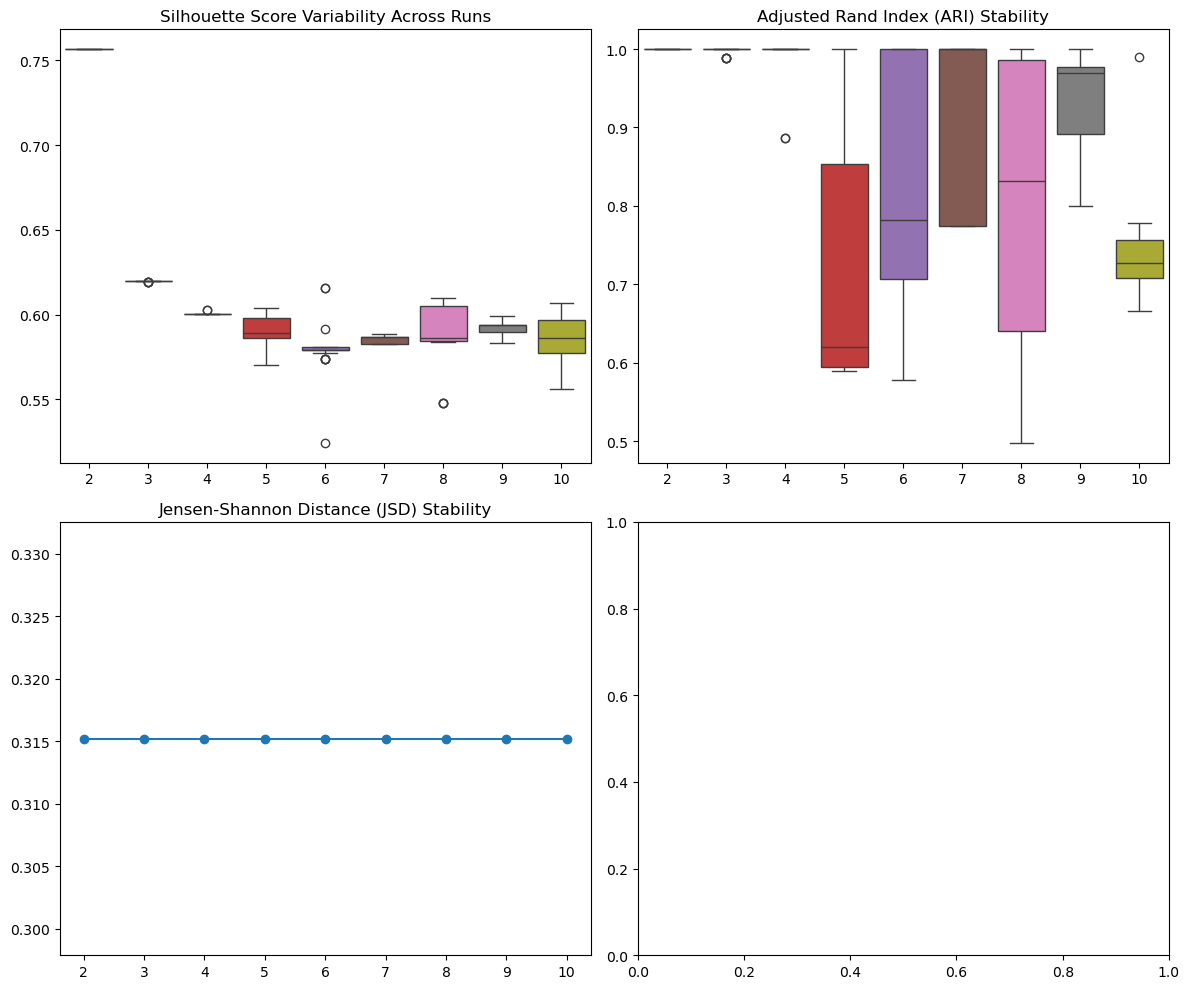

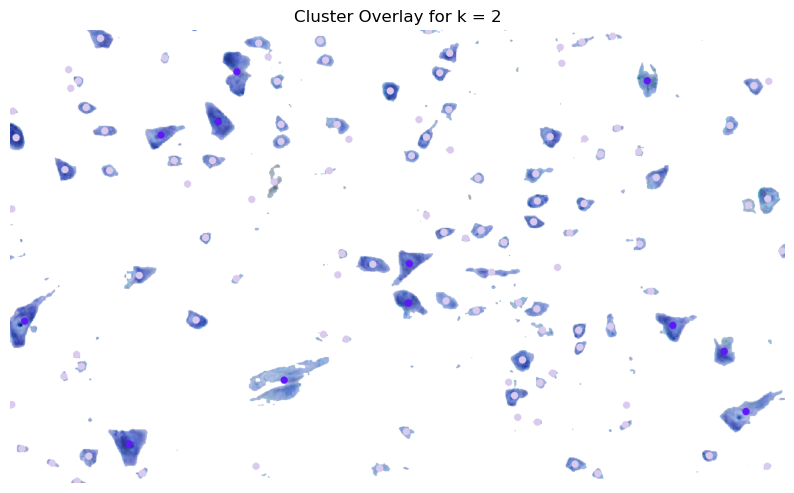

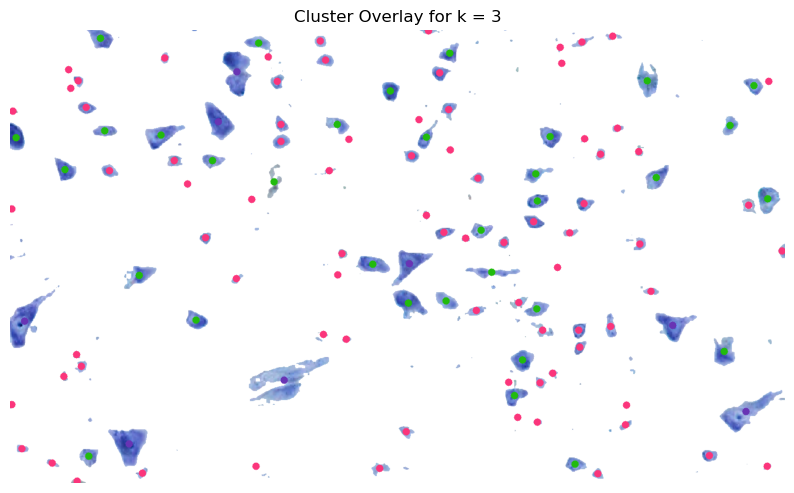

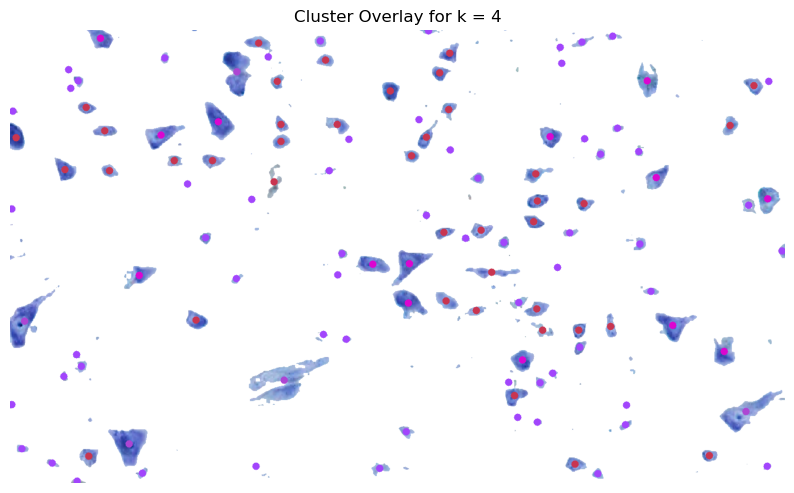

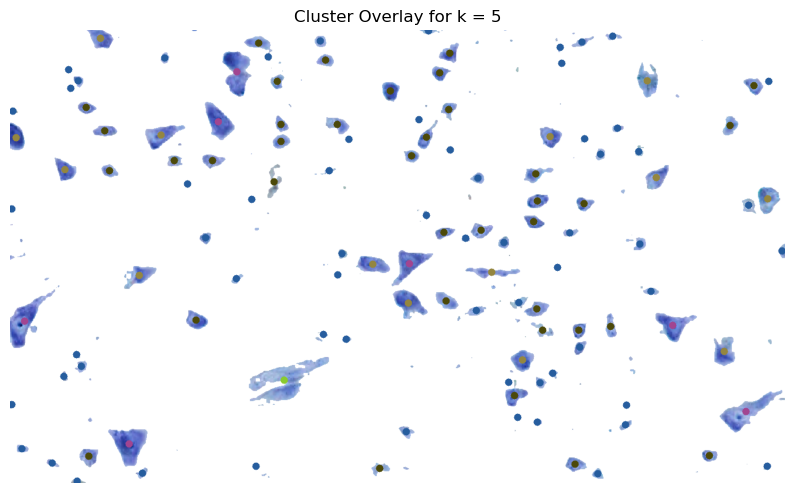

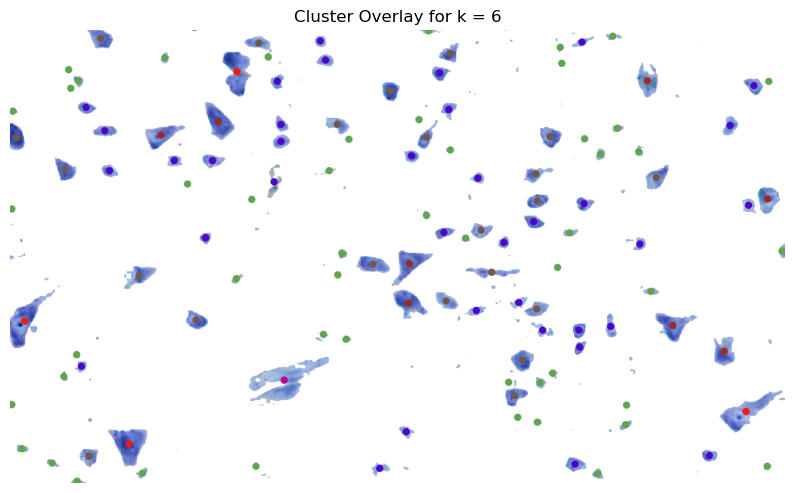

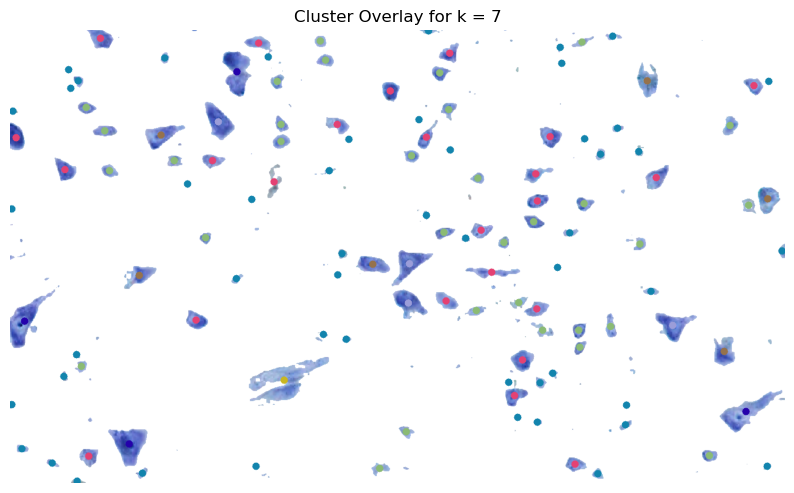

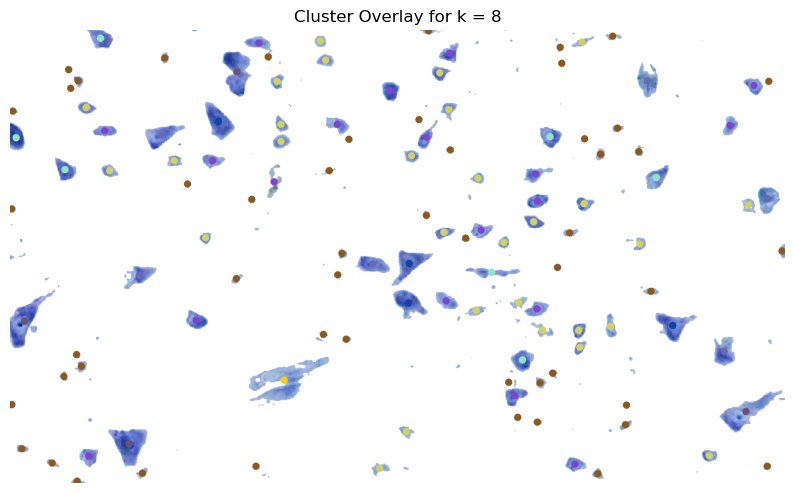

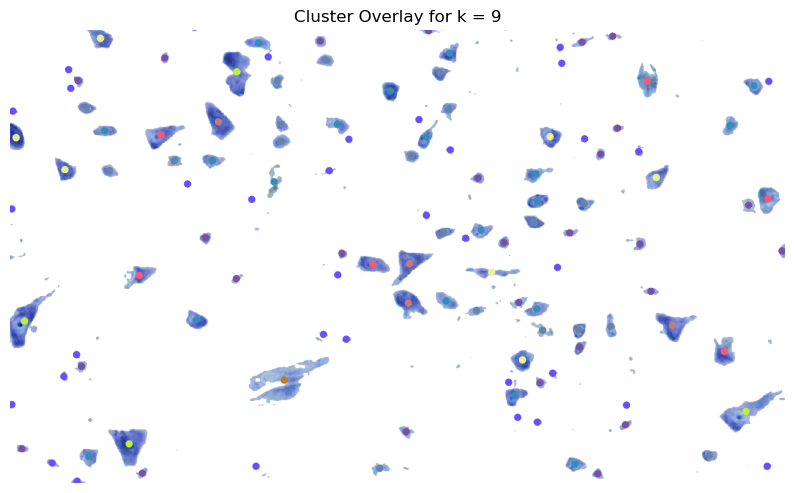

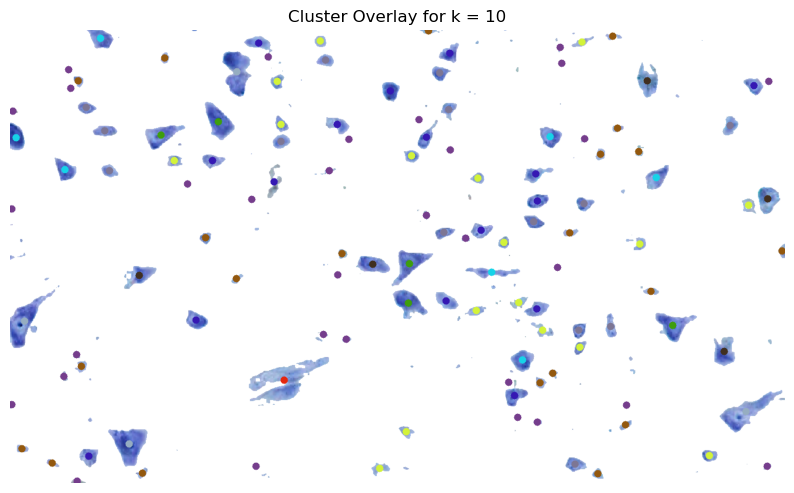

In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import jensenshannon
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the feature data
features_file = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\data_cell_for_clustering.csv"
features_df = pd.read_csv(features_file)

# Load the centroid coordinates
coordinates_file = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\moved_files\data_cell_with_centroids.csv"
coordinates_df = pd.read_csv(coordinates_file)

# Merge the dataframes on 'Cell Number'
df = pd.merge(features_df, coordinates_df, on='Cell Number', suffixes=('_features', '_coordinates'))

# Define feature columns for clustering (NO SCALING OR STANDARDIZATION)
feature_columns = ['Area_features', 'Perimeter_features', 'Major Axis Length_features', 'Minor Axis Length_features',
                   'Soma Diameter_features', 'Aspect Ratio_features', 'Circularity_features', 'Solidity_features',
                   'Local Homogeneity']
X = df[feature_columns].values  # No preprocessing applied

# Define feature weights (Increase shape-based features to 3, others remain 1)
weights = np.ones(len(feature_columns))
for i, feature in enumerate(feature_columns):
    if feature in ['Solidity_features', 'Circularity_features', 'Local Homogeneity', 'Aspect Ratio_features']:
        weights[i] = 3  # Increased weight

# Apply weights to the features (No Normalization Applied)
X_weighted = X * weights

# Load the original Nissl-stained image
image_path = r"C:\Users\srira\Brain Lab\Clustering algorithms by Sriram Balakrishnan\restored_white_background_debug-Copy1.png"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Stability analysis parameters
n_runs = 25  # Perform 25 runs for each cluster size
cluster_range = range(2, 11)  # Test different cluster sizes (2 to 10)
silhouette_scores = {k: [] for k in cluster_range}
ari_scores = {k: [] for k in cluster_range}
jsd_scores = {k: [] for k in cluster_range}

# Perform stability analysis
for k in cluster_range:
    print(f"\n🔹 Running Stability Analysis for k = {k} Clusters")
    
    first_run_labels = None
    cluster_distributions = []

    for run in range(n_runs):
        gmm = GaussianMixture(n_components=k, random_state=run, n_init=10, max_iter=500, covariance_type='full')
        cluster_labels = gmm.fit_predict(X_weighted)
        
        # Compute silhouette score
        sil_score = silhouette_score(X_weighted, cluster_labels)
        silhouette_scores[k].append(sil_score)

        # Store cluster distributions
        unique, counts = np.unique(cluster_labels, return_counts=True)
        cluster_distribution = counts / np.sum(counts)  # Convert to probability distribution
        cluster_distributions.append(cluster_distribution)

        # Compute ARI for cluster consistency
        if first_run_labels is None:
            first_run_labels = cluster_labels
        else:
            ari = adjusted_rand_score(first_run_labels, cluster_labels)
            ari_scores[k].append(ari)

    # Compute Jensen-Shannon Distance (JSD) for cluster stability
    jsd_vals = [jensenshannon(cluster_distributions[i], cluster_distributions[j]) 
                for i in range(len(cluster_distributions)) for j in range(i+1, len(cluster_distributions))]
    jsd_scores[k] = [np.mean(jsd_vals)]  # Average JSD

# Convert results to DataFrame for visualization (Fixing JSD shape issue)
jsd_df = pd.DataFrame(jsd_scores, index=cluster_range)

# Print median silhouette scores for each k
print("\n🔹 **Median Silhouette Scores for Each k**")
for k in cluster_range:
    print(f"k = {k}: {np.median(silhouette_scores[k])}")

# Display Stability Analysis Graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=pd.DataFrame(silhouette_scores), ax=axes[0, 0])
axes[0, 0].set_title('Silhouette Score Variability Across Runs')

sns.boxplot(data=pd.DataFrame(ari_scores), ax=axes[0, 1])
axes[0, 1].set_title('Adjusted Rand Index (ARI) Stability')

axes[1, 0].plot(cluster_range, jsd_df.mean(axis=1), marker='o', linestyle='-')
axes[1, 0].set_title('Jensen-Shannon Distance (JSD) Stability')

plt.tight_layout()
plt.show()

# Generate Cluster Overlay Images
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42, n_init=10, max_iter=500, covariance_type='full')
    labels = gmm.fit_predict(X_weighted)

    overlay = original_image.copy()
    colors = np.random.randint(0, 255, size=(k, 3), dtype=np.uint8)

    for i, row in df.iterrows():
        x, y = int(row['X Centroid']), int(row['Y Centroid'])
        cluster = labels[i]
        color = tuple(int(c) for c in colors[cluster])
        cv2.circle(overlay, (x, y), 7, color, -1)  # Smaller circle size = 7

    plt.figure(figsize=(10, 10))
    plt.imshow(overlay)
    plt.title(f'Cluster Overlay for k = {k}')
    plt.axis('off')
    plt.show()



🔹 Feature Weights in the GMM Model:

          Feature  Weight
             Area     1.0
        Perimeter     1.0
Major Axis Length     1.0
Minor Axis Length     1.0
    Soma Diameter     1.0
     Aspect Ratio     3.0
      Circularity     3.0
         Solidity     3.0
Local Homogeneity     3.0


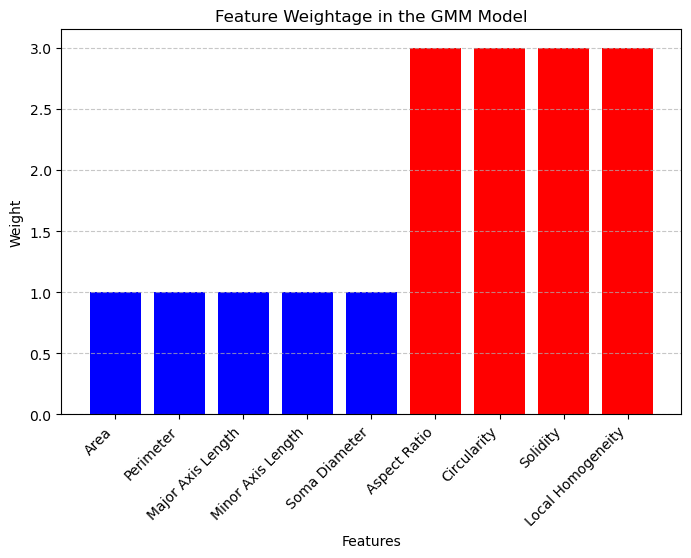

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define feature names
feature_columns = ['Area', 'Perimeter', 'Major Axis Length', 'Minor Axis Length',
                   'Soma Diameter', 'Aspect Ratio', 'Circularity', 'Solidity',
                   'Local Homogeneity']

# Define feature weights (Same as used in your GMM model)
weights = np.ones(len(feature_columns))  # Default = 1
for i, feature in enumerate(feature_columns):
    if feature in ['Solidity', 'Circularity', 'Local Homogeneity', 'Aspect Ratio']:
        weights[i] = 3  # Increased weight for shape-based features

# Create a DataFrame for display
feature_weights_df = pd.DataFrame({'Feature': feature_columns, 'Weight': weights})

# Print feature weight table
print("\n🔹 Feature Weights in the GMM Model:\n")
print(feature_weights_df.to_string(index=False))

# Plot feature weightage
plt.figure(figsize=(8, 5))
plt.bar(feature_columns, weights, color=['blue' if w == 1 else 'red' for w in weights])
plt.xlabel("Features")
plt.ylabel("Weight")
plt.title("Feature Weightage in the GMM Model")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show plot
plt.show()
